Authors:

Aman Varma: 260856896, 

Bhavvyya malhotra: 260890038,

karun prashant bashin:260907273,

katia sory : 260927168

# Setup

In [ ]:
import nltk
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
from collections import Counter
from sklearn.naive_bayes import GaussianNB , BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.classify import NaiveBayesClassifier
from nltk.classify import ClassifierI
import pickle
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Data Reading

In [2]:
import pandas as pd
df2=pd.read_csv(r'C:\Users\15145\Documents\text analytics\final.csv')

In [3]:
data=df2

# Data Exploration

In [4]:
data.head()

,Unnamed: 0,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,9443,72401347,National Account Manager,This is a National Account Manager role in the...,Buckinghamshire - Milton Keynes,Milton Keynes,full_time,permanent,UKStaffsearch,Customer Services Jobs,30000 - 45000,37500,ukstaffsearch.com
1,459,56837673,North European Account Manager (Laboratory Equ...,A superb opportunity for an experienced North ...,Middlesex,UK,full_time,permanent,JOBG8,Sales Jobs,"Up to 40,000 per year + 35000.00-40000.00",40000,hotrecruit.com
2,93,55408959,VBnet Developer,My client are a market leader in their field a...,Nottinghamshire,Nottinghamshire,full_time,permanent,JOBG8,IT Jobs,"Up to 40,000 per year + 30000.00-40000.00",40000,planetrecruit.com
3,7980,71624800,Machine Tool Fitter,Role: Machine Tool Fitter Pay: **** N/A overt...,West Yorkshire - Keighley,Keighley,full_time,permanent,UKStaffsearch,Engineering Jobs,23000 - 31500,27250,ukstaffsearch.com
4,7703,71445967,Legal Administrator,Overview: We are recruiting for a legal Admini...,Belfast,Belfast,full_time,permanent,Hays Specialist Recruitment,Legal Jobs,"15,000 - 25,000",20000,nijobfinder.co.uk


In [8]:
del data['Unnamed: 0']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
Id                    2500 non-null int64
Title                 2500 non-null object
FullDescription       2500 non-null object
LocationRaw           2500 non-null object
LocationNormalized    2500 non-null object
ContractType          2500 non-null object
ContractTime          2500 non-null object
Company               2500 non-null object
Category              2500 non-null object
SalaryRaw             2500 non-null object
SalaryNormalized      2500 non-null int64
SourceName            2500 non-null object
dtypes: int64(2), object(10)
memory usage: 234.5+ KB


In [10]:
data.describe()

,Id,SalaryNormalized
count,2.500000e+03,2500.000000
mean,6.823743e+07,35108.782000
std,4.243291e+06,15737.058138
min,5.186012e+07,5005.000000
25%,6.709936e+07,25000.000000
50%,6.920472e+07,32000.000000
75%,7.136099e+07,42500.000000
max,7.270319e+07,144000.000000


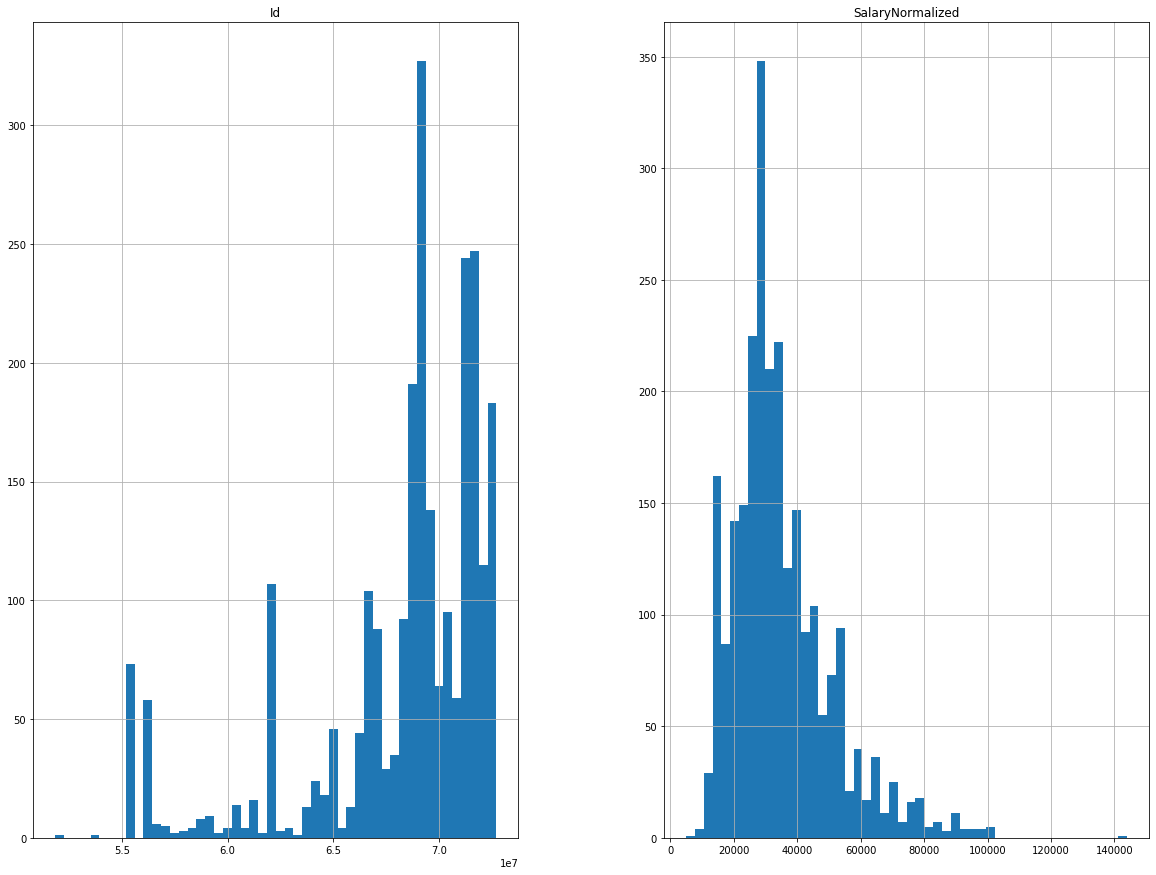

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# to make this notebook's output identical at every run
np.random.seed(0)

Apply changes to the dataset

In [13]:
# Convert categorical variable "Location" to numeric

data["Location"]=np.where(data["LocationNormalized"]=="London",1,
                         np.where(data["LocationNormalized"]=="South East London",1,
                                  np.where(data["LocationNormalized"]=="East West London",1,
                                          np.where(data["LocationNormalized"]=="East West London",1,
                                                  np.where(data["LocationNormalized"]=="Central London",1,
                                                          np.where(data["LocationNormalized"]=="North London",1,
                                                                  np.where(data["LocationNormalized"]=="South West London",1,
                                                                          np.where(data["LocationNormalized"]=="North West London",1,
                                                                                  np.where(data["LocationNormalized"]=="Edinburgh Technopole",1,
                                                                                          np.where(data["LocationNormalized"]=="Edinburgh",1,
                                                                                                  np.where(data["LocationNormalized"]=="East London",1,
                                                                                                          np.where(data["LocationNormalized"]=="West London",1,
                                                                                                                  np.where(data["LocationNormalized"]=="Aldershot",1,
                                                                                                                          np.where(data["LocationNormalized"]=="Leeds",1,
                                                                                                                                  np.where(data["LocationNormalized"]=="Reading",1,
                                                                                                                                          np.where(data["LocationNormalized"]=="Oxford",1,
                                                                                                                                                  np.where(data["LocationNormalized"]=="Slough",1,
                                                                                                                                                      np.where(data["LocationNormalized"]=="Southampton",1,0)
                                                                                                                                                      )))))))))))))))))


In [18]:
# Convert categorical variable "ContractType" & "ContractTime" to numeric

data["ContractType_num"]=np.where(data["ContractType"]=="full_time",1,0)
data["ContractTime_num"]=np.where(data["ContractTime"]=="contract",1,0)

In [19]:
data.head(50)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,Location,ContractType_num,ContractTime_num
0,72401347,National Account Manager,This is a National Account Manager role in the...,Buckinghamshire - Milton Keynes,Milton Keynes,full_time,permanent,UKStaffsearch,Customer Services Jobs,30000 - 45000,37500,ukstaffsearch.com,0,1,0
1,56837673,North European Account Manager (Laboratory Equ...,A superb opportunity for an experienced North ...,Middlesex,UK,full_time,permanent,JOBG8,Sales Jobs,"Up to 40,000 per year + 35000.00-40000.00",40000,hotrecruit.com,0,1,0
2,55408959,VBnet Developer,My client are a market leader in their field a...,Nottinghamshire,Nottinghamshire,full_time,permanent,JOBG8,IT Jobs,"Up to 40,000 per year + 30000.00-40000.00",40000,planetrecruit.com,0,1,0
3,71624800,Machine Tool Fitter,Role: Machine Tool Fitter Pay: **** N/A overt...,West Yorkshire - Keighley,Keighley,full_time,permanent,UKStaffsearch,Engineering Jobs,23000 - 31500,27250,ukstaffsearch.com,0,1,0
4,71445967,Legal Administrator,Overview: We are recruiting for a legal Admini...,Belfast,Belfast,full_time,permanent,Hays Specialist Recruitment,Legal Jobs,"15,000 - 25,000",20000,nijobfinder.co.uk,0,1,0
5,61437267,Asbestos Analyst Asbestos P****/P**** North ...,Our client is a fast growing independent asbes...,Tyne and Wear,Newcastle Upon Tyne,full_time,permanent,Future Select,Trade & Construction Jobs,"From 28,000 to 28,000 per year + Company Vehic...",28000,thecareerengineer.com,0,1,0
6,71083775,Administrator,Our FM client is an established Main Contracto...,Wiltshire - Salisbury,Salisbury,full_time,contract,CVbrowser,IT Jobs,8 per hour,15360,cvbrowser.com,0,1,1
7,62117090,"Senior Account Manager, Public Sector sales",sales government 'public sector' IT 'account m...,UK,UK,full_time,permanent,PeopleCom Ltd,IT Jobs,"From 45,000 to 60,000 per year + plus car allo...",52500,fish4.co.uk,0,1,0
8,71886971,Product Development Manager,A new opportunity has been created within an e...,Central London,Central London,full_time,permanent,Premier Consultants,"PR, Advertising & Marketing Jobs","up to 45,000 plus bonus and benefits",45000,Brand Republic Jobs,1,1,0
9,71809793,National Account Manager,Spin Master Ltd has a clear vision and strateg...,Office based South East,UK,full_time,permanent,Spinmaster c/o Pursuit NHA,Retail Jobs,45k+ bonus + benefits,45000,jobs.thegrocer.co.uk,0,1,0


In [20]:
data.groupby(["Category"]).sum()

,Id,SalaryNormalized,Location,ContractType_num,ContractTime_num
Category,,,,,
Accounting & Finance Jobs,39572797604,24935963,136,569,84
Admin Jobs,4872072991,1682471,22,63,14
Charity & Voluntary Jobs,2542058659,965938,16,33,9
Consultancy Jobs,3822299349,1857643,4,55,0
Creative & Design Jobs,1736229268,788659,9,25,1
Customer Services Jobs,2811312086,1072598,3,40,6
Domestic help & Cleaning Jobs,354343787,125088,3,5,3
"Energy, Oil & Gas Jobs",543336597,326900,5,8,0
Engineering Jobs,16337738173,8378715,10,244,16


In [22]:
dummies = pd.get_dummies(data, columns = ['Category'])

In [24]:
dummies.columns

Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'SalaryRaw',
       'SalaryNormalized', 'SourceName', 'Location', 'ContractType_num',
       'ContractTime_num', 'Category_Accounting & Finance Jobs',
       'Category_Admin Jobs', 'Category_Charity & Voluntary Jobs',
       'Category_Consultancy Jobs', 'Category_Creative & Design Jobs',
       'Category_Customer Services Jobs',
       'Category_Domestic help & Cleaning Jobs',
       'Category_Energy, Oil & Gas Jobs', 'Category_Engineering Jobs',
       'Category_Graduate Jobs', 'Category_HR & Recruitment Jobs',
       'Category_Healthcare & Nursing Jobs',
       'Category_Hospitality & Catering Jobs', 'Category_IT Jobs',
       'Category_Legal Jobs', 'Category_Logistics & Warehouse Jobs',
       'Category_Maintenance Jobs', 'Category_Manufacturing Jobs',
       'Category_Other/General Jobs',
       'Category_PR, Advertising & Marketing Jobs', 'Category_Proper

In [25]:
threshold_75th = np.percentile(dummies["SalaryNormalized"],75)

In [26]:
dummies["Salary"]=np.where(dummies["SalaryNormalized"]>= threshold_75th,"high","low")

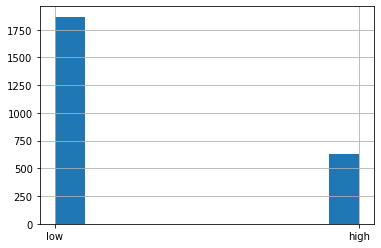

In [27]:
dummies["Salary"].hist()

# Part B

B1. Ignore the job descriptions, and train a model to predict high/low salary from all the numeric columns, e.g., part time/full time, contract vs. others, type of job (a lot of dummy variables), location (instead of using a huge number of dummy variables, you can use a list of cities in England with highest cost of living, and create a 0/1 variable which is 1 if the job is in one of those cities, else 0). What is the accuracy of your model? Show the confusion matrix.

In [28]:
from sklearn.model_selection import train_test_split

y1 = dummies["Salary"]
X1 = dummies.drop(["Id","Title","FullDescription","LocationRaw","LocationNormalized","Company","SalaryRaw","Salary","SalaryNormalized","SourceName","ContractType","ContractTime"],axis=1)
X1 = X1.iloc[:,1:]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.30,random_state=5)

In [33]:
X1

,ContractType_num,ContractTime_num,Category_Accounting & Finance Jobs,Category_Admin Jobs,Category_Charity & Voluntary Jobs,Category_Consultancy Jobs,Category_Creative & Design Jobs,Category_Customer Services Jobs,Category_Domestic help & Cleaning Jobs,"Category_Energy, Oil & Gas Jobs",...,Category_Other/General Jobs,"Category_PR, Advertising & Marketing Jobs",Category_Property Jobs,Category_Retail Jobs,Category_Sales Jobs,Category_Scientific & QA Jobs,Category_Social work Jobs,Category_Teaching Jobs,Category_Trade & Construction Jobs,Category_Travel Jobs
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2496,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating our Naive Bayes Model using Sklearn

In [30]:
model = GaussianNB()
model.fit(X_train1, y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

Making Predictions

In [31]:
expected = y_test1
predicted = model.predict(X_test1)

Getting Accuracy and Statistics

The accuracy is 36%

In [20]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

        high       0.29      0.97      0.44       197
         low       0.93      0.15      0.25       553

    accuracy                           0.36       750
   macro avg       0.61      0.56      0.35       750
weighted avg       0.76      0.36      0.30       750



The confusion matrix is:

In [21]:
print(metrics.confusion_matrix(expected, predicted))

[[191   6]
 [472  81]]


B2. Now build a classification model with text (full job description) as the only predictor. What is the accuracy of your model? Show the confusion matrix. Also show the top 10 words (excluding stopwords) that are most indicative of (i) high salary, and (ii) low salary.

clean the text

In [34]:
stemmer = PorterStemmer()
words = stopwords.words("english")
dummies['cleaned'] = dummies['FullDescription'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [35]:
dummies

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,SalaryRaw,SalaryNormalized,...,Category_Property Jobs,Category_Retail Jobs,Category_Sales Jobs,Category_Scientific & QA Jobs,Category_Social work Jobs,Category_Teaching Jobs,Category_Trade & Construction Jobs,Category_Travel Jobs,Salary,cleaned
0,72401347,National Account Manager,This is a National Account Manager role in the...,Buckinghamshire - Milton Keynes,Milton Keynes,full_time,permanent,UKStaffsearch,30000 - 45000,37500,...,0,0,0,0,0,0,0,0,low,thi nation account manag role consum product s...
1,56837673,North European Account Manager (Laboratory Equ...,A superb opportunity for an experienced North ...,Middlesex,UK,full_time,permanent,JOBG8,"Up to 40,000 per year + 35000.00-40000.00",40000,...,0,0,1,0,0,0,0,0,low,a superb opportun experienc north european acc...
2,55408959,VBnet Developer,My client are a market leader in their field a...,Nottinghamshire,Nottinghamshire,full_time,permanent,JOBG8,"Up to 40,000 per year + 30000.00-40000.00",40000,...,0,0,0,0,0,0,0,0,low,my client market leader field current look rec...
3,71624800,Machine Tool Fitter,Role: Machine Tool Fitter Pay: **** N/A overt...,West Yorkshire - Keighley,Keighley,full_time,permanent,UKStaffsearch,23000 - 31500,27250,...,0,0,0,0,0,0,0,0,low,role machin tool fitter pay n a overtim locat ...
4,71445967,Legal Administrator,Overview: We are recruiting for a legal Admini...,Belfast,Belfast,full_time,permanent,Hays Specialist Recruitment,"15,000 - 25,000",20000,...,0,0,0,0,0,0,0,0,low,overview we recruit legal administr one top le...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,72198390,Sales Advisors,My client is looking for several Sales Advisor...,Kent - Maidstone,Maidstone,full_time,permanent,UKStaffsearch,13000 - 16000,14500,...,0,0,1,0,0,0,0,0,low,my client look sever sale advisor join compani...
2496,56846540,Warehouse Operative,MUST have 6 months relevant experience. Will b...,"Lichfield, Fradley Park, West Midlands",Fradley Park,part_time,contract,Simply Recruitment,6.19 - 8.65/hour,14246,...,0,0,0,0,0,0,0,0,low,must month relev experi will load unload sort ...
2497,56281702,Senior Credit Risk Analyst,My global client based in Warwickshire are cur...,Warwickshire,Warwickshire,full_time,permanent,JOBG8,"Up to 30,000 per year + 25000.00-30000.00",30000,...,0,0,0,0,0,0,0,0,low,my global client base warwickshir current look...
2498,62118525,Telephone Fundraiser,TELEPHONE FUNDRAISERS NEEDED **** **** PER HO...,UK,UK,part_time,permanent,NL Recruitment,From 6.54 to 8 per hour,13958,...,0,0,0,0,0,0,0,0,low,telephon fundrais need per hour are you persua...


In [36]:
dummies['cleaned'].head(100)

0     thi nation account manag role consum product s...
1     a superb opportun experienc north european acc...
2     my client market leader field current look rec...
3     role machin tool fitter pay n a overtim locat ...
4     overview we recruit legal administr one top le...
                            ...                        
95    career legal specialist legal secretari recrui...
96    our client deliv expert innov ethic bird pest ...
97    a larg bluechip insur compani requir qualifi a...
98    my intern retail client current look recruit i...
99    the compani due continu growth client look rec...
Name: cleaned, Length: 100, dtype: object

Transform text into numbers

In [42]:
vectorizer = TfidfVectorizer(min_df= 5, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dummies['cleaned']).toarray()
final_features.shape

(2500, 14153)

In [43]:
final_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14945296, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [44]:
dummies["label"] = dummies["Salary"].apply(lambda x: 0 if x=="low" else 1)

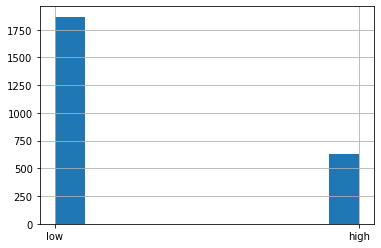

In [45]:
dummies["Salary"].hist()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(dummies["cleaned"], dummies["label"],test_size=0.30, random_state=1)

In [47]:
X_train_cv = vectorizer.transform (X_train).toarray()
X_test_cv = vectorizer.transform (X_test).toarray()

In [48]:
X_train_cv

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
y_train.sum()

434

In [50]:
y_test.sum()

199

In [51]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [52]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.7533333333333333


The acuracy score is 75%

Let's show the confusion matrix:

Text(91.68, 0.5, 'predicted label')

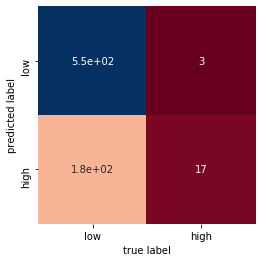

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap="RdBu", cbar=False,
xticklabels=["low", "high"], yticklabels=["low", "high"])
plt.xlabel("true label")
plt.ylabel("predicted label")

In [54]:
print(metrics.confusion_matrix(y_test, predictions))

[[548   3]
 [182  17]]


Top 10 words, excluding stopwords for high salary

In [60]:

stemmer = PorterStemmer()
words = stopwords.words("english")
dummies['cleaned'] = dummies['FullDescription'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

beta = pd.Series(' '.join(dummies.cleaned).split()).value_counts()[:10]
print(beta)  


manag      5355
work       5170
experi     4347
the        3804
develop    3378
role       3327
busi       3282
team       2906
client     2840
requir     2534
dtype: int64


Top 10 words, excluding stopwords for low salary

In [61]:

stemmer = PorterStemmer()
words = stopwords.words("english")
dummies['cleaned'] = dummies['FullDescription'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

beta = pd.Series(' '.join(dummies.cleaned).split()).value_counts().nsmallest(10)
print(beta)  

happier          1
knowledgebas     1
underdevelop     1
preemin          1
interbu          1
exag             1
practicefocus    1
motto            1
mbu              1
requirements     1
dtype: int64


B3. Train a “hybrid” model to predict high/low salary using both numeric and text data. Show the accuracy of the model and the confusion matrix.

In [62]:
dummies

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,SalaryRaw,SalaryNormalized,...,Category_Retail Jobs,Category_Sales Jobs,Category_Scientific & QA Jobs,Category_Social work Jobs,Category_Teaching Jobs,Category_Trade & Construction Jobs,Category_Travel Jobs,Salary,cleaned,label
0,72401347,National Account Manager,This is a National Account Manager role in the...,Buckinghamshire - Milton Keynes,Milton Keynes,full_time,permanent,UKStaffsearch,30000 - 45000,37500,...,0,0,0,0,0,0,0,low,thi nation account manag role consum product s...,0
1,56837673,North European Account Manager (Laboratory Equ...,A superb opportunity for an experienced North ...,Middlesex,UK,full_time,permanent,JOBG8,"Up to 40,000 per year + 35000.00-40000.00",40000,...,0,1,0,0,0,0,0,low,a superb opportun experienc north european acc...,0
2,55408959,VBnet Developer,My client are a market leader in their field a...,Nottinghamshire,Nottinghamshire,full_time,permanent,JOBG8,"Up to 40,000 per year + 30000.00-40000.00",40000,...,0,0,0,0,0,0,0,low,my client market leader field current look rec...,0
3,71624800,Machine Tool Fitter,Role: Machine Tool Fitter Pay: **** N/A overt...,West Yorkshire - Keighley,Keighley,full_time,permanent,UKStaffsearch,23000 - 31500,27250,...,0,0,0,0,0,0,0,low,role machin tool fitter pay n a overtim locat ...,0
4,71445967,Legal Administrator,Overview: We are recruiting for a legal Admini...,Belfast,Belfast,full_time,permanent,Hays Specialist Recruitment,"15,000 - 25,000",20000,...,0,0,0,0,0,0,0,low,overview we recruit legal administr one top le...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,72198390,Sales Advisors,My client is looking for several Sales Advisor...,Kent - Maidstone,Maidstone,full_time,permanent,UKStaffsearch,13000 - 16000,14500,...,0,1,0,0,0,0,0,low,my client look sever sale advisor join compani...,0
2496,56846540,Warehouse Operative,MUST have 6 months relevant experience. Will b...,"Lichfield, Fradley Park, West Midlands",Fradley Park,part_time,contract,Simply Recruitment,6.19 - 8.65/hour,14246,...,0,0,0,0,0,0,0,low,must month relev experi will load unload sort ...,0
2497,56281702,Senior Credit Risk Analyst,My global client based in Warwickshire are cur...,Warwickshire,Warwickshire,full_time,permanent,JOBG8,"Up to 30,000 per year + 25000.00-30000.00",30000,...,0,0,0,0,0,0,0,low,my global client base warwickshir current look...,0
2498,62118525,Telephone Fundraiser,TELEPHONE FUNDRAISERS NEEDED **** **** PER HO...,UK,UK,part_time,permanent,NL Recruitment,From 6.54 to 8 per hour,13958,...,0,0,0,0,0,0,0,low,telephon fundrais need per hour are you persua...,0


In [63]:
dummies['cleaned']

0       thi nation account manag role consum product s...
1       a superb opportun experienc north european acc...
2       my client market leader field current look rec...
3       role machin tool fitter pay n a overtim locat ...
4       overview we recruit legal administr one top le...
                              ...                        
2495    my client look sever sale advisor join compani...
2496    must month relev experi will load unload sort ...
2497    my global client base warwickshir current look...
2498    telephon fundrais need per hour are you persua...
2499    php develop mpa recruit repres belfast base so...
Name: cleaned, Length: 2500, dtype: object

In [88]:
temp=dummies

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
from sklearn.feature_extraction.text import TfidfTransformer

In [90]:
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(temp['cleaned'])

In [91]:
word_count_vector.shape

(2500, 10214)

In [94]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [95]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])

In [96]:
df_idf#score of each document

,idf_weights
aa,6.878536
aaae,8.131299
aaappoint,7.215008
aachiev,8.131299
aassist,8.131299
...,...
zob,8.131299
zoe,7.725834
zoembmsmarket,8.131299
zone,7.032686


In [122]:
del temp['cleaned_modified']

In [123]:
temp

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,SalaryRaw,SalaryNormalized,...,Category_Retail Jobs,Category_Sales Jobs,Category_Scientific & QA Jobs,Category_Social work Jobs,Category_Teaching Jobs,Category_Trade & Construction Jobs,Category_Travel Jobs,Salary,cleaned,label
0,72401347,National Account Manager,This is a National Account Manager role in the...,Buckinghamshire - Milton Keynes,Milton Keynes,full_time,permanent,UKStaffsearch,30000 - 45000,37500,...,0,0,0,0,0,0,0,low,thi nation account manag role consum product s...,0
1,56837673,North European Account Manager (Laboratory Equ...,A superb opportunity for an experienced North ...,Middlesex,UK,full_time,permanent,JOBG8,"Up to 40,000 per year + 35000.00-40000.00",40000,...,0,1,0,0,0,0,0,low,a superb opportun experienc north european acc...,0
2,55408959,VBnet Developer,My client are a market leader in their field a...,Nottinghamshire,Nottinghamshire,full_time,permanent,JOBG8,"Up to 40,000 per year + 30000.00-40000.00",40000,...,0,0,0,0,0,0,0,low,my client market leader field current look rec...,0
3,71624800,Machine Tool Fitter,Role: Machine Tool Fitter Pay: **** N/A overt...,West Yorkshire - Keighley,Keighley,full_time,permanent,UKStaffsearch,23000 - 31500,27250,...,0,0,0,0,0,0,0,low,role machin tool fitter pay n a overtim locat ...,0
4,71445967,Legal Administrator,Overview: We are recruiting for a legal Admini...,Belfast,Belfast,full_time,permanent,Hays Specialist Recruitment,"15,000 - 25,000",20000,...,0,0,0,0,0,0,0,low,overview we recruit legal administr one top le...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,72198390,Sales Advisors,My client is looking for several Sales Advisor...,Kent - Maidstone,Maidstone,full_time,permanent,UKStaffsearch,13000 - 16000,14500,...,0,1,0,0,0,0,0,low,my client look sever sale advisor join compani...,0
2496,56846540,Warehouse Operative,MUST have 6 months relevant experience. Will b...,"Lichfield, Fradley Park, West Midlands",Fradley Park,part_time,contract,Simply Recruitment,6.19 - 8.65/hour,14246,...,0,0,0,0,0,0,0,low,must month relev experi will load unload sort ...,0
2497,56281702,Senior Credit Risk Analyst,My global client based in Warwickshire are cur...,Warwickshire,Warwickshire,full_time,permanent,JOBG8,"Up to 30,000 per year + 25000.00-30000.00",30000,...,0,0,0,0,0,0,0,low,my global client base warwickshir current look...,0
2498,62118525,Telephone Fundraiser,TELEPHONE FUNDRAISERS NEEDED **** **** PER HO...,UK,UK,part_time,permanent,NL Recruitment,From 6.54 to 8 per hour,13958,...,0,0,0,0,0,0,0,low,telephon fundrais need per hour are you persua...,0


In [97]:
# count matrix
count_vector=cv.transform(temp['cleaned'])
 
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [118]:
feature_names = cv.get_feature_names()#storing the sum of score of the respective documenr
x=[]
for i in range(0,2500):
   
    first_document_vector=tf_idf_vector[i]
    #print the scores
    df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
    x.append(df["tfidf"].sum())    

In [120]:
len(x)

2500

In [125]:
y=pd.DataFrame({'text_score':x})

In [126]:
y

,text_score
0,7.083200
1,9.839530
2,7.145019
3,9.640108
4,9.363686
...,...
2495,10.740988
2496,5.898216
2497,6.368193
2498,8.335127


In [129]:
mergedDf = dummies.merge(y, left_index=True, right_index=True)

In [131]:
mergedDf#merging the score with dummies

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,SalaryRaw,SalaryNormalized,...,Category_Sales Jobs,Category_Scientific & QA Jobs,Category_Social work Jobs,Category_Teaching Jobs,Category_Trade & Construction Jobs,Category_Travel Jobs,Salary,cleaned,label,text_score
0,72401347,National Account Manager,This is a National Account Manager role in the...,Buckinghamshire - Milton Keynes,Milton Keynes,full_time,permanent,UKStaffsearch,30000 - 45000,37500,...,0,0,0,0,0,0,low,thi nation account manag role consum product s...,0,7.083200
1,56837673,North European Account Manager (Laboratory Equ...,A superb opportunity for an experienced North ...,Middlesex,UK,full_time,permanent,JOBG8,"Up to 40,000 per year + 35000.00-40000.00",40000,...,1,0,0,0,0,0,low,a superb opportun experienc north european acc...,0,9.839530
2,55408959,VBnet Developer,My client are a market leader in their field a...,Nottinghamshire,Nottinghamshire,full_time,permanent,JOBG8,"Up to 40,000 per year + 30000.00-40000.00",40000,...,0,0,0,0,0,0,low,my client market leader field current look rec...,0,7.145019
3,71624800,Machine Tool Fitter,Role: Machine Tool Fitter Pay: **** N/A overt...,West Yorkshire - Keighley,Keighley,full_time,permanent,UKStaffsearch,23000 - 31500,27250,...,0,0,0,0,0,0,low,role machin tool fitter pay n a overtim locat ...,0,9.640108
4,71445967,Legal Administrator,Overview: We are recruiting for a legal Admini...,Belfast,Belfast,full_time,permanent,Hays Specialist Recruitment,"15,000 - 25,000",20000,...,0,0,0,0,0,0,low,overview we recruit legal administr one top le...,0,9.363686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,72198390,Sales Advisors,My client is looking for several Sales Advisor...,Kent - Maidstone,Maidstone,full_time,permanent,UKStaffsearch,13000 - 16000,14500,...,1,0,0,0,0,0,low,my client look sever sale advisor join compani...,0,10.740988
2496,56846540,Warehouse Operative,MUST have 6 months relevant experience. Will b...,"Lichfield, Fradley Park, West Midlands",Fradley Park,part_time,contract,Simply Recruitment,6.19 - 8.65/hour,14246,...,0,0,0,0,0,0,low,must month relev experi will load unload sort ...,0,5.898216
2497,56281702,Senior Credit Risk Analyst,My global client based in Warwickshire are cur...,Warwickshire,Warwickshire,full_time,permanent,JOBG8,"Up to 30,000 per year + 25000.00-30000.00",30000,...,0,0,0,0,0,0,low,my global client base warwickshir current look...,0,6.368193
2498,62118525,Telephone Fundraiser,TELEPHONE FUNDRAISERS NEEDED **** **** PER HO...,UK,UK,part_time,permanent,NL Recruitment,From 6.54 to 8 per hour,13958,...,0,0,0,0,0,0,low,telephon fundrais need per hour are you persua...,0,8.335127


In [136]:

y1 = mergedDf["label"]
X1 = mergedDf.drop(["Id","Title","FullDescription","LocationRaw","LocationNormalized","Company","SalaryRaw","Salary","SalaryNormalized","SourceName","ContractType","ContractTime","cleaned","label"],axis=1)
#X1 = X1.iloc[:,1:]

#X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.30,random_state=5)

In [140]:
#

In [150]:
X1 = X1.iloc[:,1:]

In [151]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.30,random_state=5)

In [152]:
model = GaussianNB()
model.fit(X_train1, y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [153]:
expected = y_test1
predicted = model.predict(X_test1)

In [154]:
print(metrics.confusion_matrix(expected, predicted))

[[213 346]
 [ 12 179]]


In [155]:
print(metrics.accuracy_score(expected, predicted))

0.5226666666666666


In [156]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train1, y_train1)
predictions = naive_bayes.predict(X_test1)

In [157]:
predicted = model.predict(X_test1)

In [158]:
print(metrics.accuracy_score(expected, predicted))

0.5226666666666666


Conclusion:

We would be using the text model that is model number 2 as it has got the highest accuracy of 76%. The other two models have accuracy of 36%(numeric column model) and 53%(hybrid model). The accuracy decreased in the hybrid model because it considered both numeric columns (model 1) and text columns (model 2).

To us, this observation is intuitive because we believed that the type of contract, the location or even the industry within you are working will not define your salary. Indeed, those criteria are composed of multiples range of salaries.

However, some words like managers are automatically associated with a higher salary; which explain and validate the results of our three models.